Cluster Formation	

Refer :  https://scikit-learn.org/stable/modules/clustering.html
    1.Clustering with the k-means algorithm
       --> from sklearn.cluster import KMeans
	2.Estimating clusters with Kernel Density Estimation
	3.Clustering with hierarchical and neighborhood algorithms
        1.Agglomerative - bottom up
        2.Divisive -top down
	4.Categorizing data with decision tree and random forest algorithms
        -Decision tree , random forest 
Cluster Formation with Other Algorithms	
    1.Clustering Using Meanshift
        -->from sklearn.cluster import MeanShift
	2.Clustering Using DBSCAN
        -->from sklearn.cluster import DBSCAN
	3.Clustering Using Hierarchical Merging
        -->from sklearn.cluster import AgglomerativeClustering

C:\Users\bjawa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


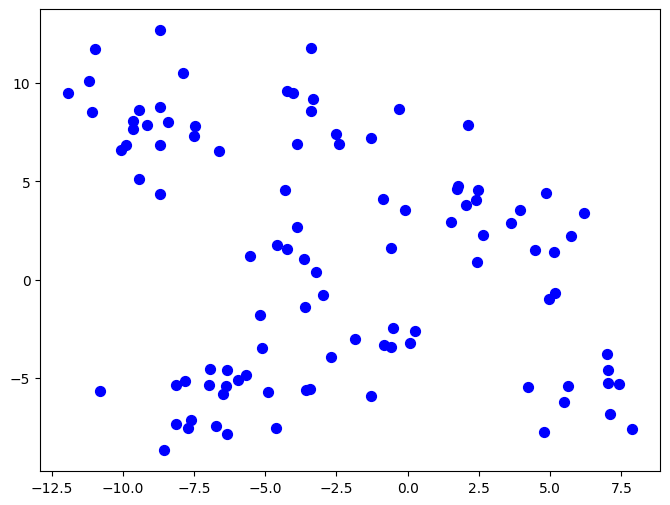

In [3]:
# Kmeans

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#creating a dataset
X,y =make_blobs(n_samples=100,centers=10,random_state=42,cluster_std=1.5)
#calling the algo for creating a model
model= KMeans(10,random_state=0)
#fit  & predict
Y= model.fit_predict(X)

#visualization

fig, ax=plt.subplots(figsize=(8,6))
ax.scatter(X[:,0],X[:,1],s=50,color='blue')

In [5]:
#Estimating clusters with Kernel Density Estimation

from sklearn.neighbors import KernelDensity
import numpy as np
rng=np.random.RandomState(42)
X=rng.random_sample((100,3))
#Model creation using the alogirthm
model=KernelDensity(algorithm='kd_tree', kernel='linear',bandwidth=0.5)
#fit
ff=model.fit(X)
#score_samples --> low to high dimensional data
ss=model.score_samples(X[:5])
print(ss)

[-0.55181668 -0.39142758 -0.63174577 -1.38426184 -0.44113388]


Clustering with hierarchical and neighborhood algorithms
        1.Agglomerative - bottom up
        2.Divisive -top down
        
        
        1.A Hierarchical clustering method works via grouping data into a tree of clusters. Hierarchical clustering begins by treating every data point as a separate cluster
        
        
        How to perform the HC:
        1.Identify the 2 clusters which can be closest together
        2.Merge the 2 maximum comparable clusters. We need to continue these steps until all the clusters are merged together.
        
        Agglomerative: (bottom -up)
        
        -->in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left (jj street -> 11 --> 1)
        
        Divisive: (Top- down)
        
        ->Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.

Categorizing data with decision tree and random forest algorithms
        -Decision tree , random forest 

    refer : day 17 
    

Cluster Formation with Other Algorithms	
    1.Clustering Using Meanshift
        -->from sklearn.cluster import MeanShift
	2.Clustering Using DBSCAN
        -->from sklearn.cluster import DBSCAN
	3.Clustering Using Hierarchical Merging
        -->from sklearn.cluster import AgglomerativeClustering
        
        

In [16]:
#meanshift
from sklearn.cluster import MeanShift
import numpy as np
X = np.array([[1, 1], [2, 1], [1, 0],
              [4, 7], [3, 5], [3, 6]])
print(np.shape(X))

#model by calling the algo

model=MeanShift(bandwidth=2,max_iter=500)
#fitting
ff=model.fit(X)
print(ff.labels_)
#predicting
pre=model.predict([[0,0],[2,2]])
print(pre)

(6, 2)
[1 1 1 0 0 0]
[1 1]


In [26]:
#DBSCAN

from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 1], [2, 1], [1, 0],
              [4, 7], [3, 5], [3, 6]])
print(np.shape(X))

#model creat9ion
model=DBSCAN(eps=3,min_samples=2)
ff=model.fit(X)
labels=ff.labels_
pre=model.fit_predict(X)
print(pre)

#removw noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('no of cluster',n_clusters_)
print('no of nosie points',n_noise_)

(6, 2)
[0 0 0 1 1 1]
no of cluster 2
no of nosie points 0


In [36]:
#affiinity 

import numpy as np
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

#dataset
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0
)
#model creation
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cc = af.cluster_centers_indices_
labels = af.labels_
print(labels)
n_clusters_ = len(cc)
print(n_clusters_)

print(af.predict([[0, 0], [4, 4]]))

import statsmodels.api as s
#X=s.add_constant(X)
m=s.OLS(labels_true,X).fit()
print(m.summary())
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)



[0 1 2 0 0 2 1 1 2 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 2 1 2 2 1 0 2 1 2 2
 2 2 0 0 0 1 0 2 1 1 1 1 0 0 0 1 2 2 2 2 0 2 0 1 2 2 1 1 1 2 1 2 0 2 1 0 0
 1 1 2 2 0 1 2 0 1 2 2 0 0 1 1 0 2 0 2 0 2 0 2 1 0 1 0 0 1 0 0 2 2 1 2 2 2
 2 2 1 0 2 0 1 2 1 2 2 2 2 2 2 0 1 1 1 0 1 1 2 0 2 0 1 2 0 1 1 2 0 1 0 2 1
 2 2 2 0 0 0 2 0 2 0 0 0 0 1 2 0 1 1 1 2 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 2 1
 0 2 1 0 2 2 2 0 1 2 1 0 1 0 1 0 0 1 2 2 2 2 0 1 1 0 2 2 2 0 1 0 0 1 0 2 2
 0 2 1 1 1 0 0 2 1 1 1 2 1 0 2 2 0 2 2 1 0 1 1 0 0 1 0 1 1 1 2 0 1 1 0 2 2
 2 2 0 0 0 0 0 1 1 2 0 0 2 2 2 1 2 1 2 2 1 1 1 2 1 0 1 2 0 1 2 2 1 2 2 2 1
 0 2 1 1]
3
[1 0]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.664
Model:                            OLS   Adj. R-squared (uncentered):              0.661
Method:                 Least Squares   F-statistic:                              294.1
Date:                Fri, 31 M

In [39]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering().fit(X)

print(clustering)
print(clustering.labels_)
print(clustering.fit_predict(X))


AgglomerativeClustering()
[1 1 1 0 0 0]
[1 1 1 0 0 0]


In [40]:
from sklearn.cluster import OPTICS
import numpy as np
X = np.array([[1, 2], [2, 5], [3, 6],
              [8, 7], [8, 8], [7, 3]])
clustering = OPTICS(min_samples=2).fit(X)
clustering.labels_

array([0, 0, 0, 1, 1, 1])

In [42]:
import numpy as np
from sklearn.mixture import GaussianMixture
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
print(gm.means_)
print(gm.predict([[0, 0], [12, 3]]))

[[10.  2.]
 [ 1.  2.]]
[1 0]


In [44]:
from sklearn.cluster import Birch
X = [[0, 1], [0.3, 1], [-0.3, 1], [0, -1], [0.3, -1], [-0.3, -1]]
brc = Birch(n_clusters=4)
print(brc.fit(X))

print(brc.predict(X))


Birch(n_clusters=4)
[0 0 0 1 1 1]


C:\Users\bjawa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_birch.py:726: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (4). Decrease the threshold.
  warnings.warn(


In [45]:
from sklearn.cluster import BisectingKMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0],
              [10, 6], [10, 8], [10, 10]])
bisect_means = BisectingKMeans(n_clusters=3, random_state=0).fit(X)
print(bisect_means.labels_)

print(bisect_means.predict([[0, 0], [12, 3]]))

print(bisect_means.cluster_centers_)

[2 2 2 0 0 0 1 1 1]
[2 0]
[[10.  2.]
 [10.  8.]
 [ 1.  2.]]
